In [ ]:
import pandas as pd
import numpy as np


In [54]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [55]:
#cek tipe data setiap kolom
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [56]:
print(df.isnull().sum()) #cek missing value setiap kolom

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [57]:
#Menghitung data statistik

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [58]:
value_counts = df['citric acid'].astype(str).value_counts(dropna=False)

print(value_counts)

citric acid
0.0     132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.0       1
0.78      1
Name: count, Length: 80, dtype: int64


In [59]:
# Transformasi data menggunakan imputasi regresi

#Memilih kolom tertentu berdasarkan lokasi
#Fungsi df.loc[] digunakan untuk memilih table berdasarkan lokasi
#Nilai pada kolom 0.0 merupakan missing value (NaN)

df.loc[df["citric acid"] == 0.0, "citric acid"] = np.NAN

df.isnull().sum()[1:6]

volatile acidity         0
citric acid            132
residual sugar           0
chlorides                0
free sulfur dioxide      0
dtype: int64

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model

missing_columns = ["citric acid"]

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)


#Stochastic Regression Imputation

random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:
        
    random_data["Ran" + feature] = df[feature + '_imp']
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #Kesalahan Standar dari perkiraan regresi sama dengan std() dari kesalahan setiap perkiraan
    
    predict = model.predict(df[parameters])
    std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()
    
    #Amati bahwa kita menyimpan indeks data yang hilang dari kerangka data asli
    random_predict = np.random.normal(size = df[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) & 
                                                                            (random_predict > 0)]




# Tampilkan nilai perhitungan statistika untuk kolom "citric acid"
pd.concat([df[["citric acid"]], random_data[["Rancitric acid"]]], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
citric acid,1467.0,0.295358,0.184819,0.010000,0.14,0.280000,0.44,1.0
Rancitric acid,1599.0,0.287755,0.183063,0.004315,0.13,0.267563,0.43,1.0


In [61]:
#cek value quality, jika ada yang lebih dari 10 maka outlier
value_counts = df['quality'].astype(str).value_counts(dropna=False)

print(value_counts)

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


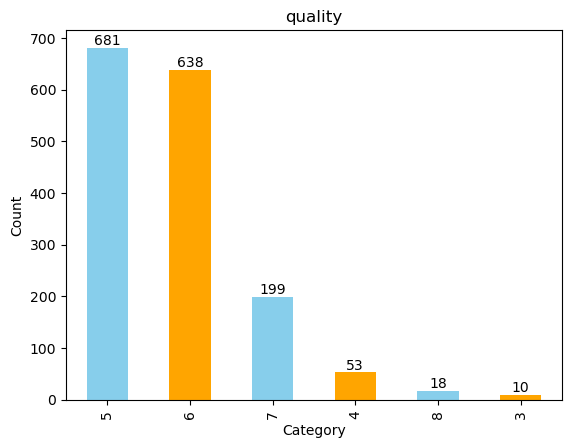

In [62]:
import matplotlib.pyplot as plt
# Create a bar chart
ax = value_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Add title and labels
plt.title('quality')
plt.xlabel('Category')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, count in enumerate(value_counts):
    ax.text(i, count , str(count), ha='center', va='bottom')

# Display the bar chart
plt.show()

In [81]:
from sklearn.feature_selection import SelectKBest, chi2

X = df.iloc[:, :-1] 
y = df['quality'] 

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Menggabungkan 2 DataFrame
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  

# 6. Menampilkan 10 Fitur Terbaik
print(featureScores.nlargest(10, 'Score'))

                   Specs        Score
6   total sulfur dioxide  2755.557984
11               quality   184.911451
5    free sulfur dioxide   161.936036
10               alcohol    46.429892
1       volatile acidity    15.580289
0          fixed acidity    11.260652
2            citric acid     8.736570
9              sulphates     4.558488
3         residual sugar     4.123295
4              chlorides     0.752426
